## Week 3 Lab

***

## Project Description

Many college courses conclude by giving students the opportunity to evaluate the course and the instructor anonymously. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because these measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor. The article titled, “Beauty in the classroom: instructors’ pulchritude and putative pedagogical productivity” (Hamermesh and Parker 2005) found that instructors who are viewed to be better looking receive higher instructional ratings.

In this lab we will analyze the data from this study in order to learn what goes into a positive professor evaluation.

The data were gathered from end of semester student evaluations for a large sample of professors from the University of Texas at Austin. In addition, six students rated the professors’ physical appearance. (This is a slightly modified version of the original data set that was released as part of the replication data for Data Analysis Using Regression and Multilevel/Hierarchical Models (Gelman and Hill 2007).) The result is a data frame where each row contains a different course and columns represent variables about the courses and professors.

Is this an observational study or an experiment? 

Observational study 

The original research question posed in the paper is whether beauty leads directly to the differences in course evaluations. Given the study design, should the question be rephrased? If so, how? 

Yes, revise wording to “Is there an association between beauty and course evaluations?” 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("evals.csv")

In [3]:
df

,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,cls_profs,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,1,1,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,single,multi credit,5,7,6,2,4,6,5.000,not formal,color
1,2,1,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,single,multi credit,5,7,6,2,4,6,5.000,not formal,color
2,3,1,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,single,multi credit,5,7,6,2,4,6,5.000,not formal,color
3,4,1,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,single,multi credit,5,7,6,2,4,6,5.000,not formal,color
4,5,2,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,multiple,multi credit,4,4,2,2,3,3,3.000,not formal,color
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,459,93,4.5,tenure track,not minority,male,english,32,60.46511,52,86,upper,multiple,multi credit,6,6,9,7,8,5,6.833,not formal,color
459,460,94,3.5,tenure track,minority,female,non-english,42,57.14286,48,84,upper,multiple,multi credit,3,8,7,4,6,4,5.333,not formal,color
460,461,94,4.4,tenure track,minority,female,non-english,42,77.61194,52,67,upper,multiple,multi credit,3,8,7,4,6,4,5.333,not formal,color
461,462,94,4.4,tenure track,minority,female,non-english,42,81.81818,54,66,upper,multiple,multi credit,3,8,7,4,6,4,5.333,not formal,color


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   course_id      463 non-null    int64  
 1   prof_id        463 non-null    int64  
 2   score          463 non-null    float64
 3   rank           463 non-null    object 
 4   ethnicity      463 non-null    object 
 5   gender         463 non-null    object 
 6   language       463 non-null    object 
 7   age            463 non-null    int64  
 8   cls_perc_eval  463 non-null    float64
 9   cls_did_eval   463 non-null    int64  
 10  cls_students   463 non-null    int64  
 11  cls_level      463 non-null    object 
 12  cls_profs      463 non-null    object 
 13  cls_credits    463 non-null    object 
 14  bty_f1lower    463 non-null    int64  
 15  bty_f1upper    463 non-null    int64  
 16  bty_f2upper    463 non-null    int64  
 17  bty_m1lower    463 non-null    int64  
 18  bty_m1uppe

In [5]:
df.describe(include='all')

,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,cls_profs,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
count,463.000000,463.000000,463.000000,463,463,463,463,463.000000,463.000000,463.000000,463.000000,463,463,463,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463,463
unique,NaN,NaN,NaN,3,2,2,2,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,tenured,not minority,male,english,NaN,NaN,NaN,NaN,upper,multiple,multi credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not formal,color
freq,NaN,NaN,NaN,253,399,268,435,NaN,NaN,NaN,NaN,306,306,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386,385
mean,232.000000,45.153348,4.174730,NaN,NaN,NaN,NaN,48.365011,74.427788,36.624190,55.177106,NaN,NaN,NaN,3.963283,5.019438,5.213823,3.412527,4.146868,4.751620,4.417844,NaN,NaN
std,133.800847,27.547052,0.543865,NaN,NaN,NaN,NaN,9.802742,16.756311,45.018481,75.072800,NaN,NaN,NaN,1.873936,1.934437,2.018224,1.637102,2.110586,1.575266,1.527380,NaN,NaN
min,1.000000,1.000000,2.300000,NaN,NaN,NaN,NaN,29.000000,10.416670,5.000000,8.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.667000,NaN,NaN
25%,116.500000,20.000000,3.800000,NaN,NaN,NaN,NaN,42.000000,62.696165,15.000000,19.000000,NaN,NaN,NaN,2.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.167000,NaN,NaN
50%,232.000000,43.000000,4.300000,NaN,NaN,NaN,NaN,48.000000,76.923080,23.000000,29.000000,NaN,NaN,NaN,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.333000,NaN,NaN
75%,347.500000,70.500000,4.600000,NaN,NaN,NaN,NaN,57.000000,87.249170,40.000000,60.000000,NaN,NaN,NaN,5.000000,7.000000,6.000000,5.000000,5.000000,6.000000,5.500000,NaN,NaN


In [6]:
df.columns

Index(['course_id', 'prof_id', 'score', 'rank', 'ethnicity', 'gender', 'language', 'age', 'cls_perc_eval', 'cls_did_eval', 'cls_students', 'cls_level', 'cls_profs', 'cls_credits', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg', 'pic_outfit', 'pic_color'], dtype='object')

Which of the following statements is false about the distribution of score? 

In [7]:
df.score.describe()

count    463.000000
mean       4.174730
std        0.543865
min        2.300000
25%        3.800000
50%        4.300000
75%        4.600000
max        5.000000
Name: score, dtype: float64

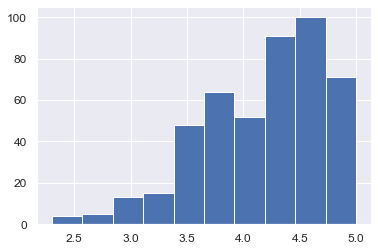

In [8]:
df.score.hist()
plt.show()

The left skewness of the data suggests that the students are less likely to rate the professors highly

## Regression Analysis

Fit a linear model called m_bty to predict average professor score by average beauty rating and add the line to your plot using the following

In [9]:
df.columns

Index(['course_id', 'prof_id', 'score', 'rank', 'ethnicity', 'gender', 'language', 'age', 'cls_perc_eval', 'cls_did_eval', 'cls_students', 'cls_level', 'cls_profs', 'cls_credits', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg', 'pic_outfit', 'pic_color'], dtype='object')

In [10]:
y = df['score']
X = df['bty_avg']

In [11]:
X = sm.add_constant(X)

In [12]:
model = sm.OLS(y,X).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           5.08e-05
Time:                        13:19:04   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.000       3.731       4.030
bty_avg        0.0666      0.016      4.090      0.000       0.035       0.099
==============================================================================
Omnibus:                       33.007   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.797
Skew:                          -0.709   Prob(JB):                     3.76e-09
Kurtosis:                       3.007   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.pvalues

const      1.561043e-191
bty_avg     5.082731e-05
dtype: float64

Average beauty score is a statistically significant predictor of evaluation score. 

True

Use residual plots to evaluate whether the conditions of least squares regression are reasonable. Which of the following statements is an incorrect analysis of the residual plots and conditions? 

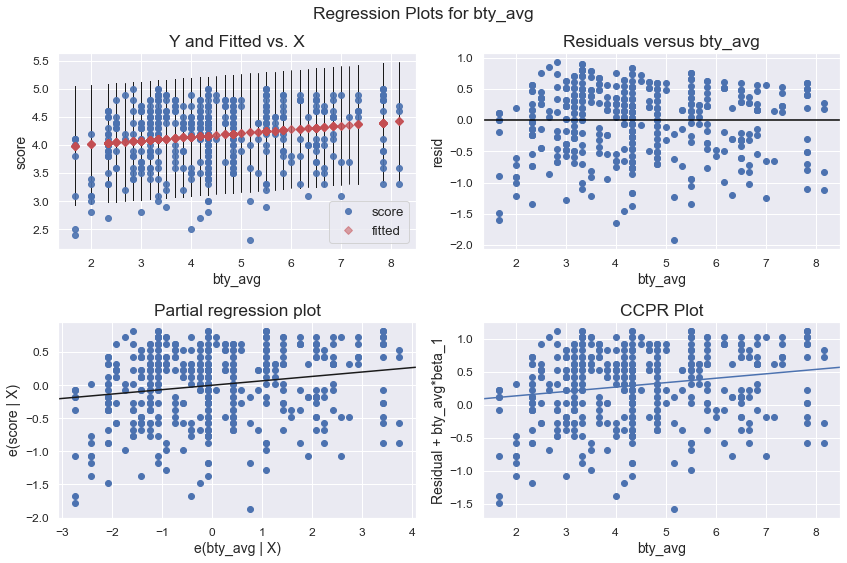

In [15]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'bty_avg', fig=fig)

Nearly normal residuals: Residuals are right skewed, but the sample size is large, so this may not be an important violation of conditions. 

P-values and parameter estimates should only be trusted if the conditions for the regression are reasonable. Using diagnostic plots, we can conclude that the conditions for this model are reasonable. 

True 

In [16]:
df.columns

Index(['course_id', 'prof_id', 'score', 'rank', 'ethnicity', 'gender', 'language', 'age', 'cls_perc_eval', 'cls_did_eval', 'cls_students', 'cls_level', 'cls_profs', 'cls_credits', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg', 'pic_outfit', 'pic_color'], dtype='object')

In [17]:
df["gender"] = pd.get_dummies(df["gender"],drop_first=True)

In [18]:
df["gender"]

0      0
1      0
2      0
3      0
4      1
      ..
458    1
459    0
460    0
461    0
462    0
Name: gender, Length: 463, dtype: uint8

In [19]:
y = df['score']
X = df[['bty_avg','gender']]

In [20]:
X = sm.add_constant(X)

In [21]:
m_bty_gen = sm.OLS(y,X).fit()

In [22]:
m_bty_gen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.45
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           8.18e-07
Time:                        13:19:05   Log-Likelihood:                -360.37
No. Observations:                 463   AIC:                             726.7
Df Residuals:                     460   BIC:                             739.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7473      0.085     44.266      0.000       3.581       3.914
bty_avg        0.0742      0.016      4.563      0.000       0.042       0.106
gender         0.1724      0.050      3.433      0.001       0.074       0.271
==============================================================================
Omnibus:                       30.145   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.960
Skew:                          -0.672   Prob(JB):                     2.56e-08
Kurtosis:                       2.925   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For two professors (one male and one female) who received the same beauty rating, the male professor is predicted to have the higher course evaluation score than the female. 

False 

Create a new model called m_bty_rank with gender removed and rank added in. How does R appear to handle categorical variables that have more than two levels? Note that the rank variable has three levels: teaching, tenure track, tenured.

In [23]:
df["rank"].value_counts()

tenured         253
tenure track    108
teaching        102
Name: rank, dtype: int64

In [24]:
df["rank"] = pd.get_dummies(df["rank"],drop_first=False)

In [25]:
df["rank"].value_counts()

0    361
1    102
Name: rank, dtype: int64

In [26]:
y = df['score']
X = df[['bty_avg','rank']]

In [27]:
X = sm.add_constant(X)

In [28]:
m_bty_rank = sm.OLS(y,X).fit()

In [29]:
m_bty_rank.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     11.06
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           2.03e-05
Time:                        13:19:05   Log-Likelihood:                -363.60
No. Observations:                 463   AIC:                             733.2
Df Residuals:                     460   BIC:                             745.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8529      0.077     50.207      0.000       3.702       4.004
bty_avg        0.0660      0.016      4.072      0.000       0.034       0.098
rank           0.1366      0.060      2.289      0.023       0.019       0.254
==============================================================================
Omnibus:                       32.233   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.817
Skew:                          -0.699   Prob(JB):                     6.14e-09
Kurtosis:                       2.942   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Which of the following is the correct order of the three levels of rank if we were to order them from lowest predicted course evaluation score to highest predicted course evaluation score? 

Tenure Track, Tenured, Teaching

We will start with a full model that predicts professor score based on rank, ethnicity, gender, language of the university where they got their degree, age, proportion of students that filled out evaluations, class size, course level, number of professors, number of credits, average beauty rating, outfit, and picture color.

In [30]:
df = pd.read_csv("evals.csv")
df.head()

,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,cls_profs,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,1,1,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
1,2,1,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,3,1,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,4,1,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,5,2,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,multiple,multi credit,4,4,2,2,3,3,3.0,not formal,color


In [31]:
df.drop(['course_id','prof_id','cls_did_eval','bty_f1lower','bty_f1upper','bty_f2upper','bty_m1lower', 'bty_m1upper','bty_m2upper'], axis=1, inplace=True)

In [32]:
df.head(1)

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_students,cls_level,cls_profs,cls_credits,bty_avg,pic_outfit,pic_color
0,4.7,tenure track,minority,female,english,36,55.81395,43,upper,single,multi credit,5.0,not formal,color


### One-hot encoding

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          463 non-null    float64
 1   rank           463 non-null    object 
 2   ethnicity      463 non-null    object 
 3   gender         463 non-null    object 
 4   language       463 non-null    object 
 5   age            463 non-null    int64  
 6   cls_perc_eval  463 non-null    float64
 7   cls_students   463 non-null    int64  
 8   cls_level      463 non-null    object 
 9   cls_profs      463 non-null    object 
 10  cls_credits    463 non-null    object 
 11  bty_avg        463 non-null    float64
 12  pic_outfit     463 non-null    object 
 13  pic_color      463 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 50.8+ KB


In [34]:
df2 = pd.get_dummies(data=df,drop_first=True)

In [35]:
df2.head()

,score,age,cls_perc_eval,cls_students,bty_avg,rank_tenure track,rank_tenured,ethnicity_not minority,gender_male,language_non-english,cls_level_upper,cls_profs_single,cls_credits_one credit,pic_outfit_not formal,pic_color_color
0,4.7,36,55.81395,43,5.0,1,0,0,0,0,1,1,0,1,1
1,4.1,36,68.80000,125,5.0,1,0,0,0,0,1,1,0,1,1
2,3.9,36,60.80000,125,5.0,1,0,0,0,0,1,1,0,1,1
3,4.8,36,62.60163,123,5.0,1,0,0,0,0,1,1,0,1,1
4,4.6,59,85.00000,20,3.0,0,1,1,1,0,1,0,0,1,1


In [36]:
df2.columns

Index(['score', 'age', 'cls_perc_eval', 'cls_students', 'bty_avg', 'rank_tenure track', 'rank_tenured', 'ethnicity_not minority', 'gender_male', 'language_non-english', 'cls_level_upper', 'cls_profs_single', 'cls_credits_one credit', 'pic_outfit_not formal', 'pic_color_color'], dtype='object')

In [37]:
y = df2['score']
X = df2[['age', 'cls_perc_eval', 'cls_students', 'bty_avg', 'rank_tenure track', 'rank_tenured', 'ethnicity_not minority', 'gender_male', 'language_non-english', 'cls_level_upper', 'cls_profs_single', 'cls_credits_one credit', 'pic_outfit_not formal', 'pic_color_color']]

In [38]:
X = sm.add_constant(X)

In [39]:
m_full = sm.OLS(y,X).fit()

In [40]:
m_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.366
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           6.55e-14
Time:                        13:19:05   Log-Likelihood:                -326.52
No. Observations:                 463   AIC:                             683.0
Df Residuals:                     448   BIC:                             745.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.0952      0.291     14.096      0.000       3.524       4.666
age                       -0.0090      0.003     -2.872      0.004      -0.015      -0.003
cls_perc_eval              0.0053      0.002      3.461      0.001       0.002       0.008
cls_students               0.0005      0.000      1.205      0.229      -0.000       0.001
bty_avg                    0.0400      0.018      2.287      0.023       0.006       0.074
rank_tenure track         -0.1476      0.082     -1.798      0.073      -0.309       0.014
rank_tenured              -0.0973      0.066     -1.467      0.143      -0.228       0.033
ethnicity_not minority     0.1235      0.079      1.571      0.117      -0.031       0.278
gender_male                0.2109      0.052      4.071      0.000       0.109       0.313
language_non-english      -0.2298      0.111     -2.063      0.040      -0.449      -0.011
cls_level_upper            0.0605      0.058      1.051      0.294      -0.053       0.174
cls_profs_single          -0.0147      0.052     -0.282      0.778      -0.117       0.088
cls_credits_one credit     0.5020      0.116      4.330      0.000       0.274       0.730
pic_outfit_not formal     -0.1127      0.074     -1.525      0.128      -0.258       0.033
pic_color_color           -0.2173      0.072     -3.039      0.003      -0.358      -0.077
==============================================================================
Omnibus:                       30.719   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.095
Skew:                          -0.666   Prob(JB):                     2.40e-08
Kurtosis:                       3.218   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Which of the following is the correct intrepetation of the coefficient associated with the ethnicity variable.
Non-minority professors are expected on average to score … 

0.12 points higher than minority professors, all else held constant. 

In [41]:
df2.corr()

,score,age,cls_perc_eval,cls_students,bty_avg,rank_tenure track,rank_tenured,ethnicity_not minority,gender_male,language_non-english,cls_level_upper,cls_profs_single,cls_credits_one credit,pic_outfit_not formal,pic_color_color
score,1.000000,-0.107032,0.185166,0.025970,0.187142,-0.020407,-0.071924,0.075824,0.128607,-0.108284,-0.083705,-0.025467,0.204976,-0.037858,-0.154772
age,-0.107032,1.000000,-0.108253,-0.012626,-0.304603,-0.561929,0.395046,0.103120,0.285088,-0.002055,0.091463,0.009641,-0.025277,-0.188307,-0.013866
cls_perc_eval,0.185166,-0.108253,1.000000,-0.353953,0.152828,0.057584,-0.107253,-0.142359,-0.089261,0.024089,0.038703,0.120189,0.115910,0.111687,-0.128748
cls_students,0.025970,-0.012626,-0.353953,1.000000,0.099003,-0.059053,0.176054,0.096993,0.125560,-0.086507,-0.203698,-0.095078,-0.107882,-0.291010,0.086478
bty_avg,0.187142,-0.304603,0.152828,0.099003,1.000000,0.181973,-0.167939,-0.041319,-0.134767,0.014612,-0.034028,0.047514,-0.080257,-0.101332,-0.283272
rank_tenure track,-0.020407,-0.561929,0.057584,-0.059053,0.181973,1.000000,-0.605408,-0.193418,-0.243219,0.224297,-0.014866,0.025654,0.037092,0.040614,-0.024638
rank_tenured,-0.071924,0.395046,-0.107253,0.176054,-0.167939,-0.605408,1.000000,0.112777,0.268479,-0.078267,0.126381,0.038577,-0.273142,-0.232144,-0.027564
ethnicity_not minority,0.075824,0.103120,-0.142359,0.096993,-0.041319,-0.193418,0.112777,1.000000,0.114642,-0.292186,0.136129,-0.175785,-0.247490,-0.027623,-0.096671
gender_male,0.128607,0.285088,-0.089261,0.125560,-0.134767,-0.243219,0.268479,0.114642,1.000000,-0.003805,-0.056579,0.028858,0.044268,-0.087284,0.141991
language_non-english,-0.108284,-0.002055,0.024089,-0.086507,0.014612,0.224297,-0.078267,-0.292186,-0.003805,1.000000,0.143448,0.067094,-0.024469,-0.227365,-0.103686


In [42]:
df2.corr()["score"].sort_values()

pic_color_color          -0.154772
language_non-english     -0.108284
age                      -0.107032
cls_level_upper          -0.083705
rank_tenured             -0.071924
pic_outfit_not formal    -0.037858
cls_profs_single         -0.025467
rank_tenure track        -0.020407
cls_students              0.025970
ethnicity_not minority    0.075824
gender_male               0.128607
cls_perc_eval             0.185166
bty_avg                   0.187142
cls_credits_one credit    0.204976
score                     1.000000
Name: score, dtype: float64

Elimination of which variable from the full model yielded the highest adjusted R-squared? 

cls_profs

#### Python code done by Dennis Lam